# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [17]:
from sklearn.cluster import KMeans
kmeans =KMeans(n_clusters=8) #creo que el default ya es 8
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
#Silhoutte Score
from sklearn.metrics import silhouette_score
y_pred_08=kmeans.labels_
print(silhouette_score(X, y_pred_08))

0.5398971441034137


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [19]:
kmeans =KMeans(n_clusters=5)
kmeans.fit(X)
y_pred_05=kmeans.labels_
print(silhouette_score(X, y_pred_05))

0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [20]:
kmeans =KMeans(n_clusters=3)
kmeans.fit(X)
y_pred_03=kmeans.labels_
print(silhouette_score(X, y_pred_03))

0.5711381937868844


In [21]:
"""
Fue más alto el Score con 3 clusters, lo cual hace sentido dado que hay 3 categorías de vino.

"""

'\nFue más alto el Score con 3 clusters, lo cual hace sentido dado que hay 3 categorías de vino.\n\n'

In [22]:
y.unique() #3 categorías de vino. 

array([0, 1, 2])

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [27]:
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.simplefilter('ignore')

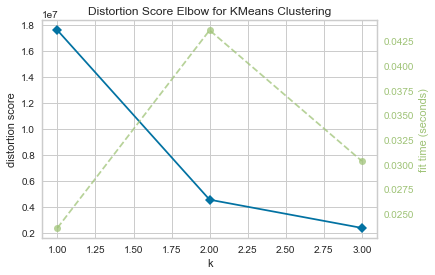

In [31]:
modelo=KMeans()
visual=KElbowVisualizer(modelo, metric='distortion', k=(1,4))
visual.fit(X)
visual.show();

#Los métodos silhouette y calinski_harabaz tiran un error por la forma de los datos. 
#La gráfica indica que lo mejor es tener 2 clusters! 

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [32]:
from sklearn import cluster

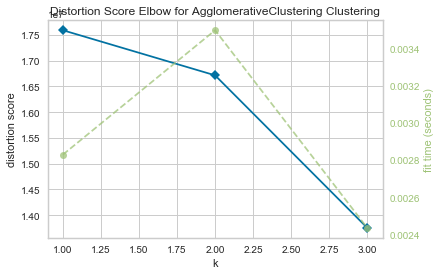

In [33]:
modelo=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
modelo.fit(X)

visual=KElbowVisualizer(modelo, metric='distortion', k=(1,4))
visual.fit(X)
visual.show();
#igual me recomienda 2 clusters

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [61]:
from matplotlib.lines import Line2D


In [62]:
modelo=cluster.AgglomerativeClustering(n_clusters=3)
modelo.fit(X)
y = modelo.labels_

In [63]:
X = pd.DataFrame(X)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [64]:
y 

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [55]:
y = y +1
y #lo hice para que no salieran en blanco según yo, pero no ayudó

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 2, 2, 3,
       2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 2, 2, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3,
       3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 2])

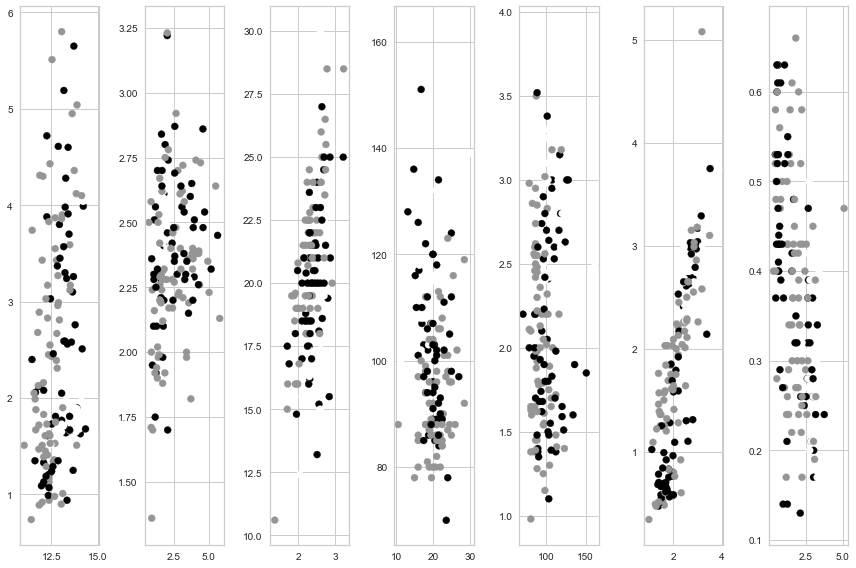

In [69]:
fig, ax = plt.subplots(1,7, figsize=(12,8))

for i in range(7):
    ax[i].scatter(X.iloc[:,i], X.iloc[:,i+1], c=y)
    

plt.tight_layout();

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [87]:
from sklearn.decomposition import PCA

pca=PCA().fit(X)
pca_x=pca.transform(X)
y = pd.Series(data["target"])

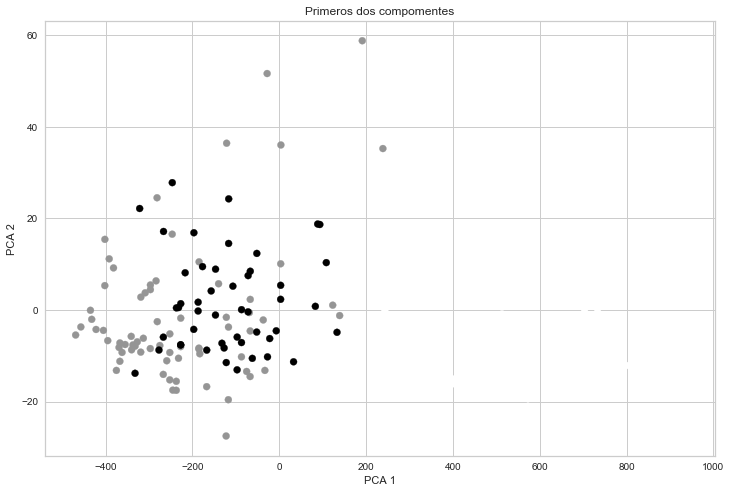

In [97]:
fig=plt.figure(figsize=(12,8))
ax= fig.add_subplot(1,1,1)
ax.scatter(pca_x[:,0], pca_x[:,1], c=y)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title("Primeros dos compomentes")


plt.show();

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [98]:
from sklearn.manifold import TSNE

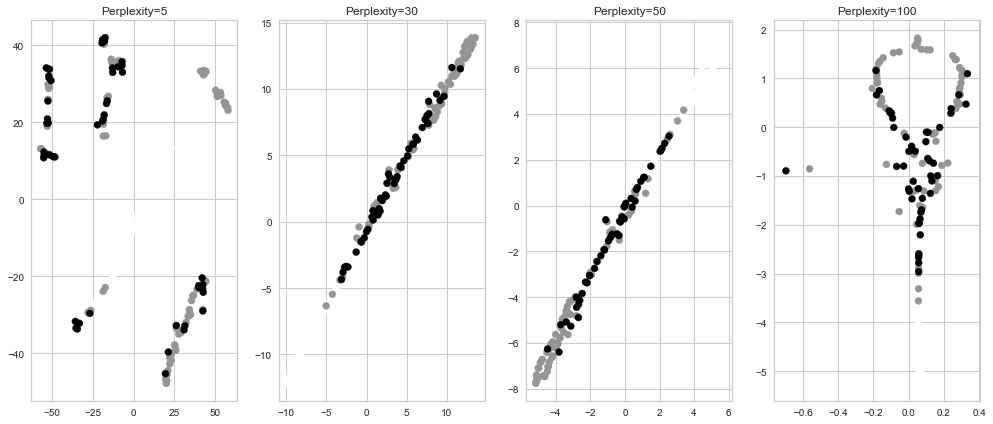

In [99]:
fig, ax=plt.subplots(1, 4, figsize=(17,7))

for i, p in enumerate([5, 30, 50, 100]):
    tsne=TSNE(perplexity=p)
    x=tsne.fit_transform(X)
    ax[i].scatter(x[:,0], x[:,1], c=y)
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();

In [ ]:
#Con Perplexity = 100 está interesante la forma. En general se confunde mucho la máquina. 